<a href="https://colab.research.google.com/github/auzaluis/upsa_mod_202502/blob/master/forecasting/script_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Carga de datos

In [ ]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.formula.api import ols

In [ ]:
# Carga de datos
path = '/content/drive/MyDrive/Teaching/UPSA/2025.02/modelacion/forecasting/sales.csv'
df = pd.read_csv(path)
df

,period,sales
0,1/1/2006,6455.898
1,2/1/2006,7036.648
2,3/1/2006,9383.576
3,4/1/2006,9160.716
4,5/1/2006,9500.516
...,...,...
120,1/1/2016,24077.208
121,2/1/2016,23762.268
122,3/1/2016,29407.364
123,4/1/2016,24786.960


### 2. Preprocesado

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   period  125 non-null    object 
 1   sales   125 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


In [ ]:
df['period'] = pd.to_datetime(df['period'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   period  125 non-null    datetime64[ns]
 1   sales   125 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


In [ ]:
# Entrenamiento
df_training = df[df['period'] <= '2015-12-01']
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   period  120 non-null    datetime64[ns]
 1   sales   120 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


In [ ]:
# Descomposición de la serie
decomp = seasonal_decompose(
    df_training.set_index("period")["sales"],
    model = "additive",
    period = 12
)

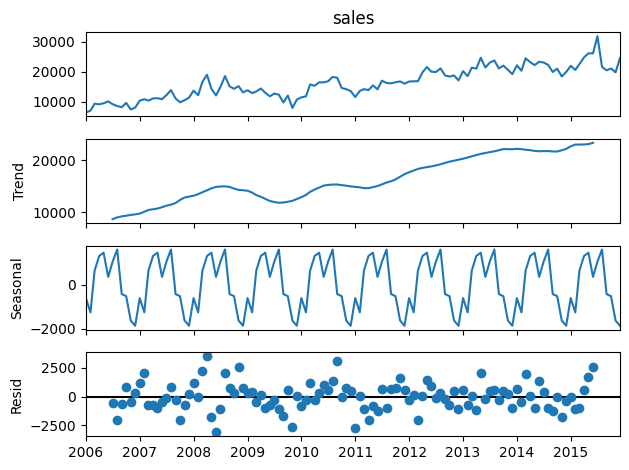

In [ ]:
decomp.plot();

### 3. Entrenamiento del modelo

In [ ]:
df_model = df_training.copy()


In [ ]:
df_model['trend'] = range(1, len(df_model) + 1)
df_model['month'] = df_model['period'].dt.month_name()

In [ ]:
df_model.head()

,period,sales,trend,month
0,2006-01-01,6455.898,1,January
1,2006-02-01,7036.648,2,February
2,2006-03-01,9383.576,3,March
3,2006-04-01,9160.716,4,April
4,2006-05-01,9500.516,5,May


In [ ]:
# Modelo de regresión
model = ols(
    formula = 'sales ~ trend + month',
    data = df_model
).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     50.32
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           2.17e-38
Time:                        23:48:28   Log-Likelihood:                -1080.5
No. Observations:                 120   AIC:                             2187.
Df Residuals:                     107   BIC:                             2223.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9551.2648    733

### 4. Diagnóstico del modelo

In [ ]:
df_model['predicted'] = model.predict()

In [ ]:
df_model.head()

,period,sales,trend,month,predicted
0,2006-01-01,6455.898,1,January,7743.888443
1,2006-02-01,7036.648,2,February,7369.740643
2,2006-03-01,9383.576,3,March,9407.084043
3,2006-04-01,9160.716,4,April,10077.760843
4,2006-05-01,9500.516,5,May,10343.848043


In [ ]:
px.scatter(
    df_model,
    x = 'sales',
    y = 'predicted',
    title = 'Sales vs Predicted'
).add_shape(
    type = 'line',
    x0 = df_model['sales'].min(),
    y0 = df_model['sales'].min(),
    x1 = df_model['sales'].max(),
    y1 = df_model['sales'].max()
)

In [ ]:
# Serie temporal + predicciones
px.line(
    df_model,
    x = 'period',
    y = ['sales', 'predicted'],
    title = 'Sales vs Predicted'
)